In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

dir_path = os.getcwd()
plt.style.use("bmh")
mpl.rcParams['lines.linewidth'] = 1

## Load all relevant data

In [11]:
etfs_df = pd.read_csv(os.path.join(dir_path, "data", "inputs", "etfs_full.csv"))
etfs_df["date"] = pd.to_datetime(etfs_df["date"])
# set date as index to make it easier to merge with macro data
etfs_df.set_index("date", inplace=True)
# resample to daily frequency and forward fill (this will make it easier to merge with macro data)
etfs_df = etfs_df.resample("D").last().ffill()

features = pd.read_csv(os.path.join(dir_path, "data", "inputs", "fredmd_transf_df.csv"))
features["date"] = pd.to_datetime(features["date"])
# set date as index to make it easier to merge with etfs data
features.set_index("date", inplace=True)

features_level = pd.read_csv(os.path.join(dir_path, "data", "inputs", "fredmd_raw_df.csv"))
features_level["date"] = pd.to_datetime(features_level["date"])
# set date as index to make it easier to merge with etfs data
features_level.set_index("date", inplace=True)

<Axes: xlabel='date'>

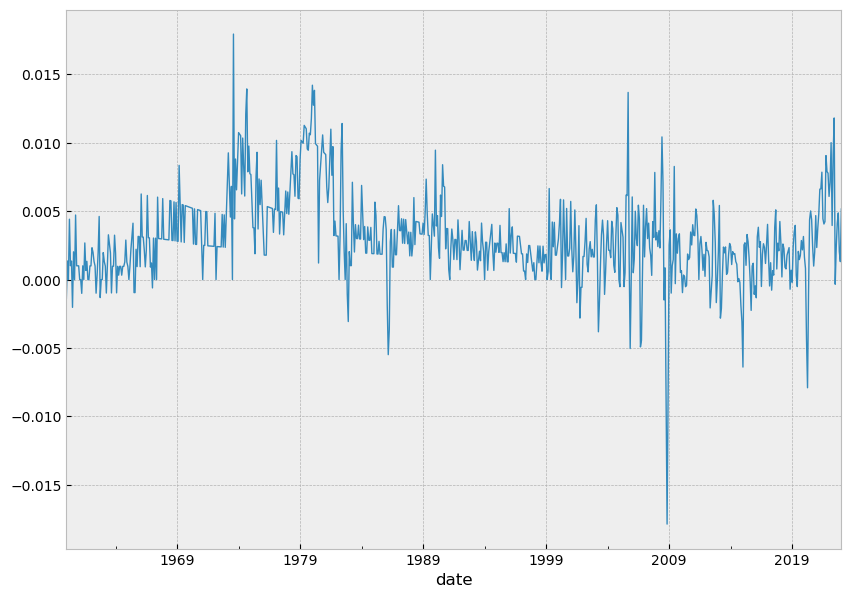

In [33]:
features["CPIAUCSL"].plot(figsize=(10, 7))

<Axes: xlabel='date'>

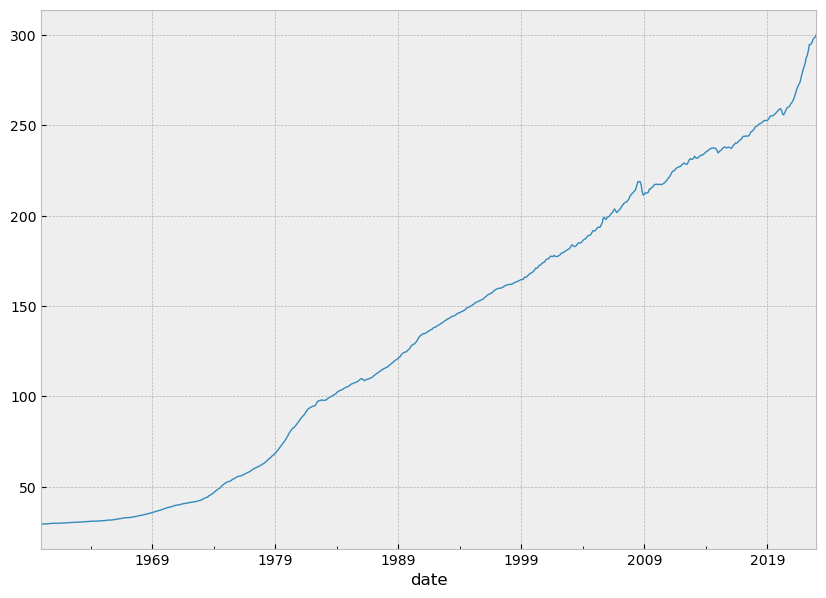

In [34]:
features_level["CPIAUCSL"].plot(figsize=(10, 7))

<Axes: xlabel='date'>

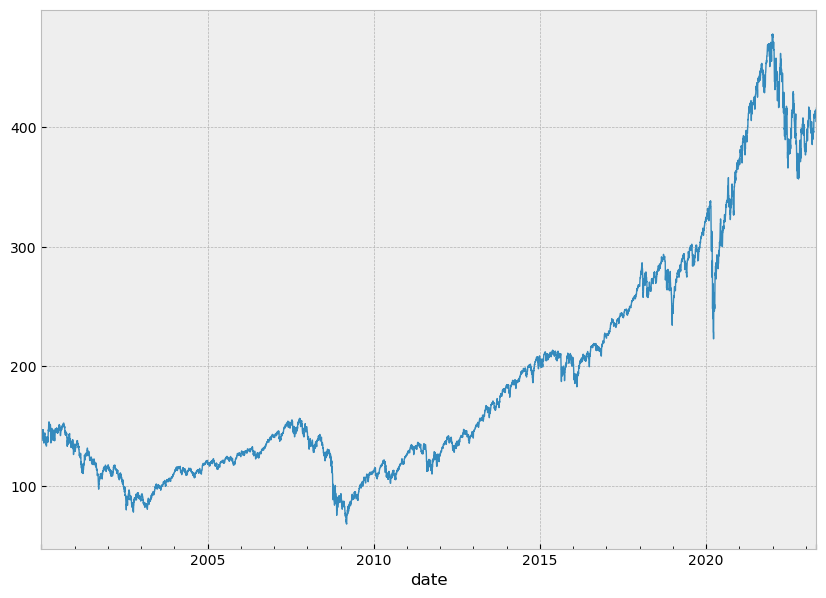

In [35]:
etfs_df["SPY"].plot(figsize=(10, 7))

## Merge datasets

Most of the macroeconomic timeseries are indexes on the original (raw) data. Maybe it will be easier to start with the tranformed (transf) dataset.

We have 36 etfs in total. Since not all of them are available since 2000, we arbitrarily 2010 as the start date. This decision implies that we end up with 28 etfs plus 119 features after merging. Furthremore, we have 152 monthly observations. 

In [45]:
etfs_df.dropna(axis=1, how="any")

,SPY,XLI,XLE,XLK,XLV,XLU,XLF,XLY,XLP,XLB
date,,,,,,,,,,
2000-01-03,145.4375,28.8438,26.5625,55.4375,30.2969,27.4531,18.5749,30.1250,22.7500,25.9688
2000-01-04,139.7500,28.0469,26.0625,52.6250,29.6094,26.6250,17.7629,29.2188,22.1094,25.7188
2000-01-05,140.0000,27.9219,26.7500,51.8438,29.3438,27.2969,17.6233,28.8594,22.5000,26.7813
2000-01-06,137.7500,28.2969,27.7813,50.1250,29.4375,27.2500,18.3973,29.1875,22.9219,27.4688
2000-01-07,145.7500,29.3750,28.0781,51.0000,29.7969,27.4844,18.7018,30.5625,24.3750,27.4531
...,...,...,...,...,...,...,...,...,...,...
2023-04-24,412.6300,100.8500,86.2800,147.1100,135.0500,69.9700,33.1400,147.3500,76.8800,81.2500
2023-04-25,406.0800,98.9900,84.6600,143.9700,133.6100,69.9000,32.5700,144.4300,76.7800,79.4900
2023-04-26,404.3600,97.1200,83.5300,146.1100,131.7100,68.2600,32.2600,143.6900,76.1800,78.5500


In [40]:
etfs_df.loc["2010-01-01":, :].dropna(axis=1, how="any").shape

(4866, 28)

In [38]:
merge_transf_df = etfs_df.loc["2010-01-01":, :].dropna(axis=1, how="any").merge(features, left_index=True, right_index=True, how="left").dropna()
merge_transf_df.head()

,SPY,XLI,XLE,XLK,XLV,XLU,XLF,XLY,XLP,XLB,...,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA
date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,111.4400,27.79,57.01,22.930,31.07,31.02,11.6930,29.77,26.47,32.99,...,0.004413,0.004091,-0.001738,0.000299,0.003212,0.000397,0.002184,-0.001284,0.003983,0.002112
2010-02-01,109.0600,27.79,56.30,21.200,31.46,29.72,11.7093,29.28,26.40,31.34,...,-0.003179,-0.001099,0.000527,-0.001151,-0.001333,-0.001305,-0.000031,-0.003551,-0.002218,0.001206
2010-03-01,111.8900,29.22,56.66,21.970,31.70,29.56,11.9529,31.00,27.22,31.98,...,-0.001056,-0.001145,0.001430,0.000064,0.000645,0.000100,0.001415,-0.001435,-0.000044,0.002325
2010-04-01,117.8000,31.44,58.54,23.060,32.31,30.07,13.0572,33.07,28.11,34.51,...,-0.001511,-0.002564,0.001267,0.000106,0.000250,0.000081,0.000544,-0.003841,-0.000730,0.001620
2010-05-01,118.8125,32.57,59.91,23.389,30.88,30.44,13.1214,34.82,27.63,33.99,...,-0.002920,-0.001716,0.000997,-0.000691,-0.001083,-0.000646,0.000314,-0.002732,-0.002924,0.001826


In [39]:
merge_transf_df.shape

(152, 155)

<Axes: title={'center': 'SPY vs CPIAUCSL'}, xlabel='Date'>

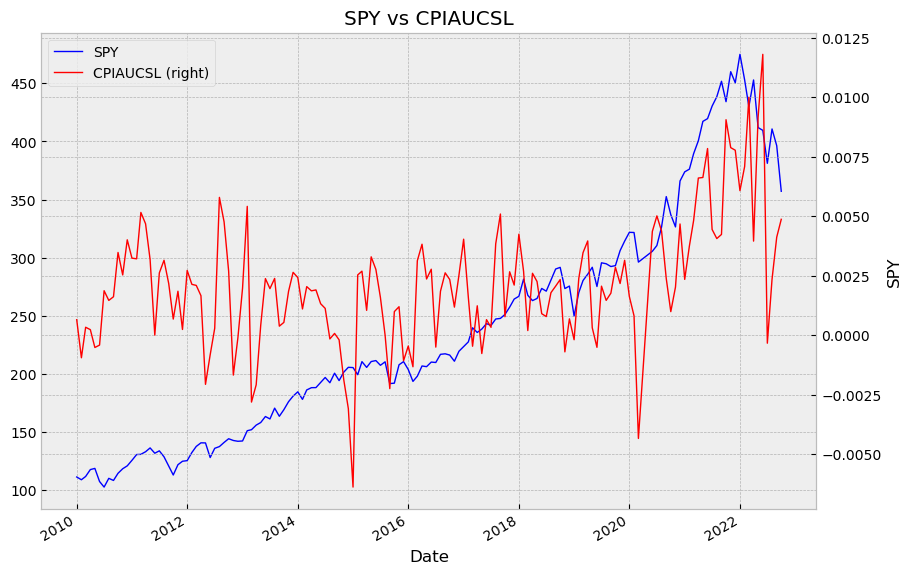

In [42]:
merge_transf_df.plot(y=["SPY", "CPIAUCSL"],
                     secondary_y=["CPIAUCSL"],
                     figsize=(10, 7),
                     legend=True,
                     title="SPY vs CPIAUCSL",
                     xlabel="Date",
                     ylabel="SPY",
                     grid=True,
                     color=["blue", "red"],
                     linewidth=1,
                     linestyle="-",
                    #  marker="o",
                     markersize=5,
                     markerfacecolor="red")

In [43]:
# export merged data
merge_transf_df.to_csv(os.path.join(dir_path, "data", "inputs", "2010_etfs_macro_transf.csv"), index=True)

In [46]:
merge_transf_2000_df = etfs_df.dropna(axis=1, how="any").merge(features, left_index=True, right_index=True, how="left").dropna()
merge_transf_2000_df.head()

,SPY,XLI,XLE,XLK,XLV,XLU,XLF,XLY,XLP,XLB,...,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA
date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,140.9375,27.0000,27.2500,51.6250,30.5000,27.4375,18.8286,28.1875,23.0000,23.7500,...,0.006116,-0.001597,0.002601,0.004109,0.004902,0.003639,0.003131,-0.002778,0.007243,0.002975
2000-03-01,138.4375,25.5469,26.8125,56.4375,28.3750,25.3438,16.9509,25.3906,20.3281,20.7656,...,0.010111,0.003192,0.003112,0.006423,0.006701,0.006637,0.004292,0.001940,0.012709,0.001775
2000-04-01,150.3750,29.2031,29.3125,60.5625,30.6719,26.7344,19.7041,29.2656,21.2188,23.0469,...,-0.004032,-0.000797,0.002069,-0.000582,-0.001215,-0.001203,-0.000836,-0.001512,-0.004051,0.000457
2000-05-01,147.0625,30.3125,29.3438,55.7813,30.4063,28.4844,19.4503,29.5313,22.6250,22.2500,...,0.000000,0.003185,0.002581,0.001164,0.001215,0.001805,0.000836,0.000103,-0.001753,0.001923
2000-06-01,145.3125,29.7344,31.9688,51.5000,29.3125,28.6250,21.0109,27.3125,24.0000,21.6406,...,0.007380,-0.002388,0.004628,0.006957,0.006657,0.005992,0.003390,-0.003126,0.009124,0.002706


In [47]:
merge_transf_2000_df.to_csv(os.path.join(dir_path, "data", "inputs", "2000_etfs_macro_transf.csv"), index=True)